# Pymaceuticals Inc.
#by Olga Petrova
---

### Analysis

    A study on 249 mice identified with squamous cell carcinoma (SCC), a commonly occurring form of skin cancer, recieved treatment with a range of drug regiments. Over the course of 45 days, tumor development was observed and measured.  The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

    Capomulin treatment shows results similar to the drug Ramicane, with tumor volume decreasing over time. If compared to other treatments both Capomulin and Ramicane performed significantly better then other treatments, with tumor size shrinking over time.

    Compared to Placebo, Capomuline showed significantly better tumor shinkage.

    If we compare size of mice with tumor size, we see positive correlation, meaning that tumor size increases with mass. It could be a significate finding, but at the same time it could be just correlation. We have to keep in mind that body parts also increase with size.

    This study was performed on roughly equal parts of male and female mice.

    


    
- You've just joined Pymaceuticals, Inc., a new pharmaceutical company that specializes in anti-cancer medications. Recently, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

The executive team has tasked you with generating all of the tables and figures needed for the technical report of the clinical study. They have also asked you for a top-level summary of the study results.
 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

%matplotlib inline
import os
# os.chdir("C:\DataAnalyticsBootcamp\Week5DataVisualization\Pymaceuticals\Challenge-5-Pymaceuticals\Challenge5_Pymaceuticals.ipynb")
#print(os.getcwd())

In [29]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [30]:
#print mouse_metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [31]:
#print study_results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [32]:
# Find common column
print(mouse_metadata.columns)
print(study_results.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [33]:

# Combine the data into a single DataFrame
# Display the data table for preview
data_complete = pd.merge(mouse_metadata, study_results, on="Mouse ID")
data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice.
number_of_mice = data_complete["Mouse ID"].nunique()
#number_of_mice = data_complete["Mouse ID"].count()
print(f"Number of mice in the trial is {number_of_mice}")
print(f"Number of records in the trial {len(data_complete)}")

Number of mice in the trial is 249
Number of records in the trial 1893


In [35]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = data_complete[data_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
print(f"Duplicate mice data")
duplicate_mice

Duplicate mice data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_complete.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_data['Mouse ID'].nunique()
print(f"Number of unique mice in cleaned data is {number_of_mice}")
print(f"Number of records in cleaned data is {len(clean_data)}")

Number of unique mice in cleaned data is 249
Number of records in cleaned data is 1888


## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
def summary_statistics(df):
    return pd.Series({
        'Tumor Volume Mean (mm3)': df['Tumor Volume (mm3)'].mean(),
        'Tumor Volume Median(mm3)': df['Tumor Volume (mm3)'].median(),
        'variance': df['Tumor Volume (mm3)'].var(),
        'std_dev': df['Tumor Volume (mm3)'].std(),
        'sem': df['Tumor Volume (mm3)'].sem()
    })

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
statistics_df = clean_data.groupby('Drug Regimen').apply(summary_statistics)
statistics_df = statistics_df.reset_index()
# Display the summary statistics
statistics_df.head()






,Drug Regimen,Tumor Volume Mean (mm3),Tumor Volume Median(mm3),variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [40]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
statistics_df_advanced = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
).reset_index()

statistics_df_advanced.head()

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

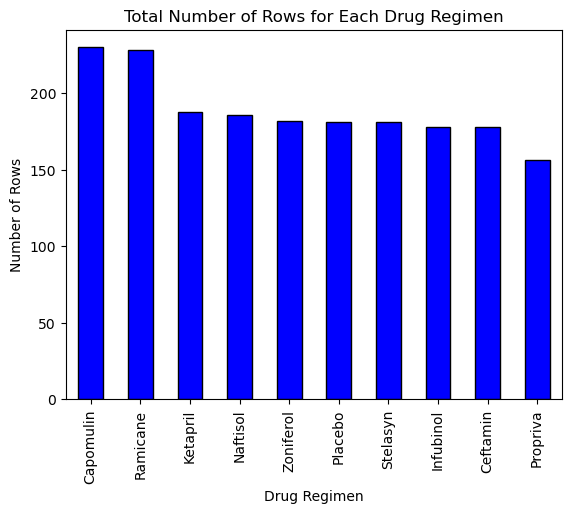

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data['Drug Regimen'].value_counts()

regimen_counts.plot(kind='bar', color='blue', edgecolor='black')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

plt.show()

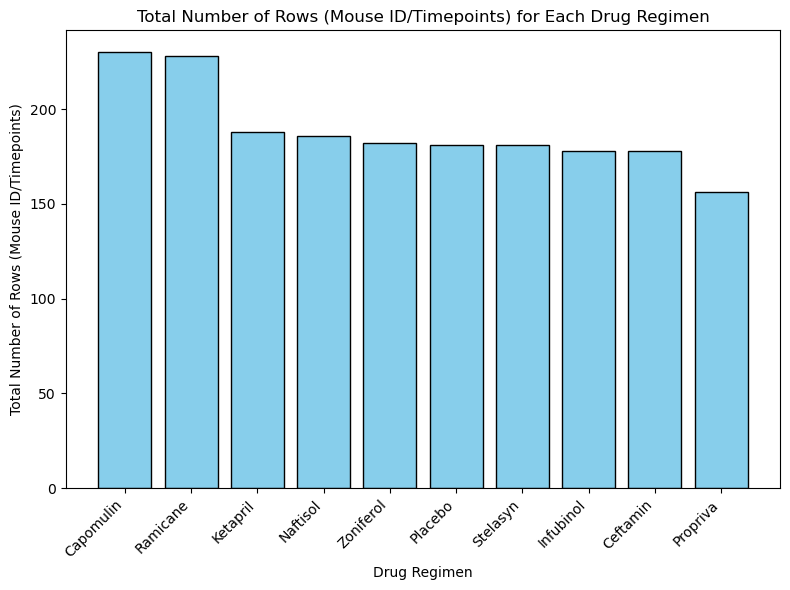

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# row_counts = clean_data.groupby('Drug Regimen').size()

# Create a bar plot
plt.figure(figsize=(8, 6))
#plt.bar(row_counts.index, row_counts.values, color='skyblue', edgecolor='black')
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue', edgecolor='black')


plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

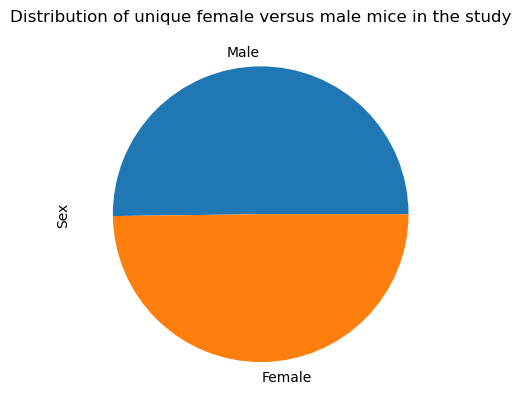

In [43]:
# Get the unique mice with their gender
unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()
gender_count = unique_mice['Sex'].value_counts()

gender_count.plot.pie()

# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
#plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Distribution of unique female versus male mice in the study')
# Make the pie chart
plt.show()


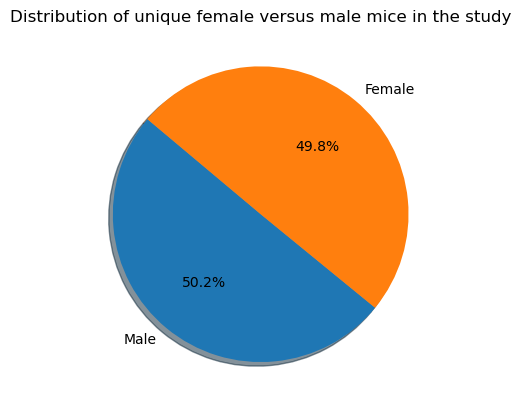

In [44]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
# unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()
#gender_count = unique_mice['Sex'].value_counts()
#Generate a pie chart, using pyplot
#gender_count.plot.pie(autopct='%1.1f%%', colors=['blue', 'pink'], startangle=140, shadow=True, figsize=(7, 7))

plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('Distribution of unique female versus male mice in the study')
plt.show()



## Quartiles, Outliers and Boxplots

In [45]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin', 'Placebo']

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = (
    clean_data[clean_data["Drug Regimen"].isin(drugs)]
    .sort_values("Timepoint", ascending=True)
    .drop_duplicates(["Mouse ID"], keep="last")
    .rename(columns={"Tumor Volume (mm3)": "Final Tumor Volume (mm3)"})
)

final_tumor_volume



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumor Volume (mm3),Metastatic Sites
1163,l872,Placebo,Male,19,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
...,...,...,...,...,...,...,...,...
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
224,w914,Capomulin,Male,24,21,45,36.041047,2
706,c757,Placebo,Male,9,27,45,69.042841,3


In [46]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

clean_data_with_final = (
    pd.merge(clean_data, final_tumor_volume[["Mouse ID", "Final Tumor Volume (mm3)"]], on="Mouse ID")
    .sort_values(["Mouse ID", "Timepoint"])
)
clean_data_with_final.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume (mm3)
454,a203,Infubinol,Female,20,23,0,45.000000,0,67.973419
455,a203,Infubinol,Female,20,23,5,48.508468,0,67.973419
456,a203,Infubinol,Female,20,23,10,51.852437,1,67.973419
457,a203,Infubinol,Female,20,23,15,52.777870,1,67.973419
458,a203,Infubinol,Female,20,23,20,55.173336,1,67.973419


In [47]:

# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Create an empty dictionary to hold tumor volume data for each drug
tumor_vol_data = {}

# Populate the tumor volume data for each drug
for drug in drugs:
    drug_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Final Tumor Volume (mm3)']
    tumor_vol_data[drug] = drug_data



In [48]:

# Calculate the Interquartile Range (IQR) and quantitatively determine if there are any potential outliers.
# The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1)


# Determine outliers using the upper and lower bounds
outliers = {}

for drug in drugs:
    # Access the tumor volume data using the drug name as the key
    drug_data = tumor_vol_data[drug]

    # Calculate Q1 and Q3 for IQR
    Q1 = drug_data.quantile(0.25)
    Q3 = drug_data.quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[drug] = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]

    print(f"Outliers for {drug}:")
    print(outliers[drug])

    #print(f"{Q1=} {Q3=} {IQR=} {lower_bound=} {upper_bound=}")
    print()



    


Outliers for Capomulin:
Series([], Name: Final Tumor Volume (mm3), dtype: float64)

Outliers for Ramicane:
Series([], Name: Final Tumor Volume (mm3), dtype: float64)

Outliers for Infubinol:
669    36.321346
Name: Final Tumor Volume (mm3), dtype: float64

Outliers for Ceftamin:
Series([], Name: Final Tumor Volume (mm3), dtype: float64)

Outliers for Placebo:
Series([], Name: Final Tumor Volume (mm3), dtype: float64)



Text(0.5, 0.98, '')

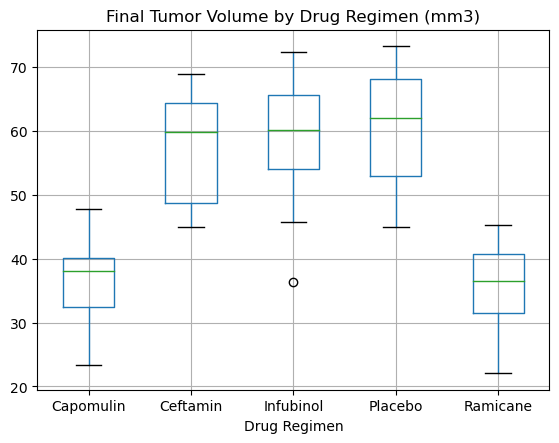

In [49]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
#Boxplot for final_tumor_volume

final_tumor_volume.boxplot(by="Drug Regimen", column="Final Tumor Volume (mm3)")

plt.title("Final Tumor Volume by Drug Regimen (mm3)")
plt.suptitle('')



## Line and Scatter Plots

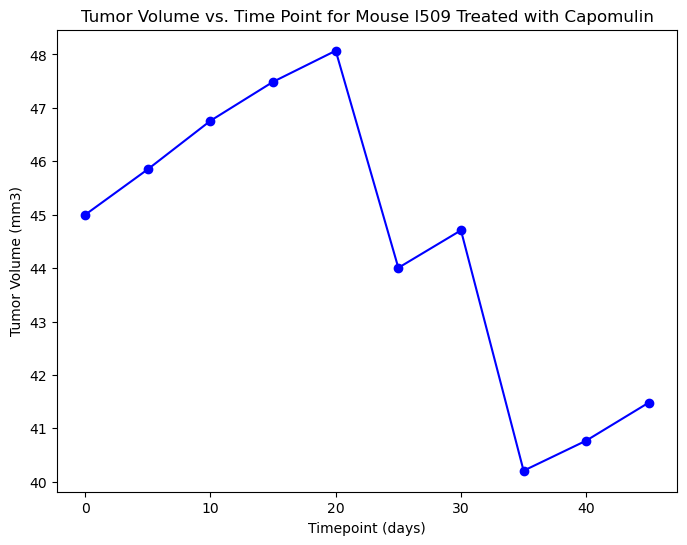

In [50]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
mouse_id = 'l509'  #mouse ID
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Plot tumor volume vs. time point
plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


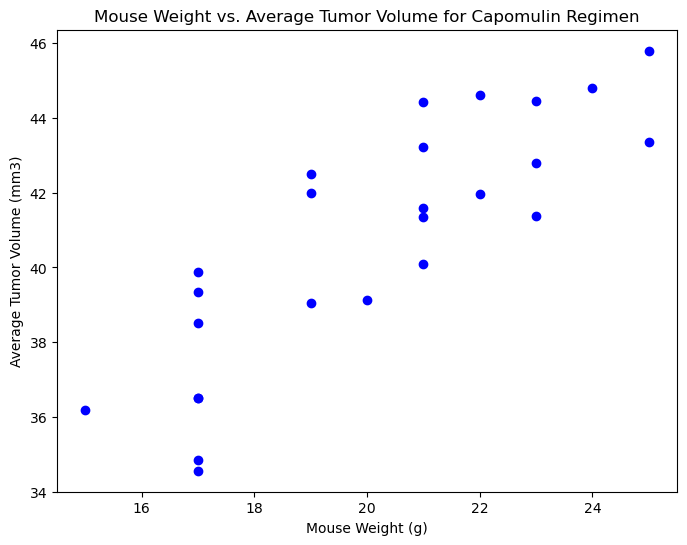

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a DataFrame to hold both average tumor volume and mouse weight
capomulin_summary = pd.DataFrame({
    'Average Tumor Volume (mm3)': average_tumor_volume,
    'Mouse Weight (g)': mouse_weight
})

# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_summary['Mouse Weight (g)'], capomulin_summary['Average Tumor Volume (mm3)'], color='blue')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.84


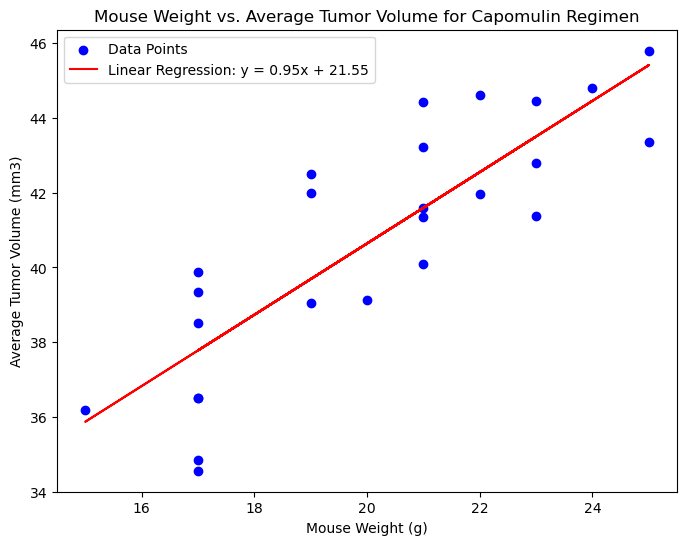

R-squared: 0.71
p-value: 1.3225722434712404e-07


In [52]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(capomulin_summary['Mouse Weight (g)'], capomulin_summary['Average Tumor Volume (mm3)'])[0]
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_summary['Mouse Weight (g)'], capomulin_summary['Average Tumor Volume (mm3)'])

# Generate the regression line values
regression_values = slope * capomulin_summary['Mouse Weight (g)'] + intercept

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_summary['Mouse Weight (g)'], capomulin_summary['Average Tumor Volume (mm3)'], color='blue', label='Data Points')

# Plot the regression line
plt.plot(capomulin_summary['Mouse Weight (g)'], regression_values, color='red', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display legend
plt.legend()

# Show the plot
plt.show()

# Display the r-squared value
print(f"R-squared: {r_value**2:.2f}")
print(f"p-value: {p_value}")
